<h1> Hypothesis Testing </h1>

Let us consider the problem of testing the hypontesis on the probability of heads o a given coin. We are given the information that the coin gives 25 heads out of 100 tosses. We want to draw a new experiment with this coin to test the given information.

To do this, we model the situation with the binomial distribution. Let $n$ be the size of the sample we are taking for this test, that is to say, the number of tosses of the coin. Let $X$ the random variable that counts the number of heads out of the $n$ tosses.

Therefore, the two competing hypotheses are:
$$
H_0:~ p = p_0 \leq 0.25 \qquad H_1:~ p\geq p_0=0.25
$$

In this case the null hypothesis is "the satus quo" hypothesis, that is, the coin is tail skew biased.

For simplicity we will consider as the null hypothesis $H_0:~ p =p_0$. In this case we will have a probability of type I error to be $\alpha(p_0)$. This simplification will make easier for us to test the hypotheses. Besides, as it can be shown in the general case if the probability of making a type I error $\alpha(p_0)$ is small then it would be smaller for the non simplified $H_0:~ p\leq p_0$ since the following holds:

$$
\alpha(p_0)= \sup_{p\leq p_0}\alpha(p)
$$


Now, having simplified the null hypothesis, ee will design this test such us the probability of making a type I error is $0.1, 0.01$.

The test statistic we will use is the vaariable $X$ itself, which under the null hypothesis has a binomial distribution $Bin(n, p_0)$. The decition rule we will use is:
* Compute the p-value for this test
* Reject $H_0$ if the computed p-value is less than $\alpha_0=0.1, 0.01$ depending on the significance level we have chosen.





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd




# params for the plots:
plt.rcParams["figure.figsize"] = (12, 6)

Set the values:

In [ ]:
p0 = 0.25
alpha1 = 0.1
n = 20

X_obs = [7, 8, 9]

p_values = {}

for x in X_obs:
  p_val  = 1 - scipy.stats.binom.cdf(x-1, n = n, p = p0)
  p_values[f"P(X >= {x}|H_0)"] = p_val

p_values

{'P(X >= 7|H_0)': 0.21421805239879177,
 'P(X >= 8|H_0)': 0.10181185692272265,
 'P(X >= 9|H_0)': 0.04092516770651855}

Note that observing a random sample of 8 or more heads will give us, under the null hypothesis, a probability of $0.102$ which is approximately $0.1$. In this case we can state that for values of the test statistic bigger and including 8 we will reject the null hypothesis in favor of the alternative one with a significance level of 0.1.


Then, let us define the rejection limit for this test to be $X_{rej} = 8$ and the rejection region $\{x\in \mathbb{N}~:~ x\geq 8\}$.

Observe that the rejection region depends on the significance level, so for instace if we want a smaller significance level, lets say $\alpha$ =0.05$, then according to the data printed above, the rejection region is $\{x\in \mathbb{N}~:~ x\geq 9\}$

Now, let us show by means of a graph that for values of $p$ less or equal than $p_0$ we wil obtain smaller type I probability, that is:
$$
\alpha(p_0)\geq \alpha(p)\quad \text{for all } p\leq p_0
$$

In [ ]:
#H_0 is rejected for X>=8  X_rej = 8

X_rej = 8

def Prob_typeI_error(p, n,X_rej):

  return 1 - scipy.stats.binom.cdf(X_rej - 1, n=n, p = p)

P = np.linspace(0.001, 0.25, 100)

alphas = Prob_typeI_error(P, n, X_rej)

df = pd.DataFrame({"p": P, "alpha(p)" : alphas})
df

,p,alpha(p)
0,0.001000,0.000000e+00
1,0.003515,2.775558e-15
2,0.006030,2.065015e-13
3,0.008545,3.269163e-12
4,0.011061,2.506351e-11
...,...,...
95,0.239939,8.338791e-02
96,0.242455,8.777399e-02
97,0.244970,9.230620e-02
98,0.247485,9.698529e-02


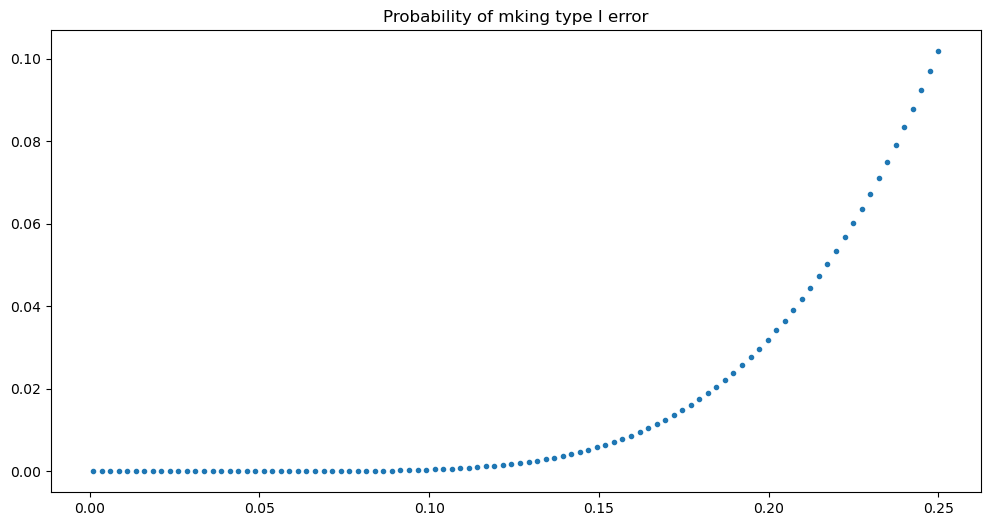

In [ ]:
plt.plot(P, alphas, ".")
plt.title("Probability of mking type I error")
plt.show()

### Power function of the test:

For a rejection region $RR$ fixed, the power function of a test is defined as the probability of rejecting the null hypothesis when the true value of the parameter in question is $theta$. In other words:
$$
\pi(\theta) = \mathbb{P}(\text{reject }H_0 \text{ given that }\theta_{true} = \theta) = \mathbb{P}_{\theta}(T \in RR)
$$

where $\mathbb{P}_{\theta}$ is a short notation for the computation of probability under the law of $\theta$.

In our example the rejection region for the significance level of 0.1 is $\{x\geq 8\}$, but as we already mention this rejection region changes with different levels of significance. We will conmpute for different signifance levels the rejection regions and the power functions corresponding to them.

In [ ]:
def power_test(distribution, critical_value, side, *args):
    """
    parameters:

    theta: real number. The values of the parameter to test.
    distribution: name of the distribution of the test statistic:
        Binomial: binom
        Normal: norm,
        Poisson: poisson
    critical_value: the real number. The limit or limits of rejection region

    """

    if side == "greater":
        if distribution == "norm":
            scale = params
            power = lambda theta: 1 - scipy.stats.norm.cdf(critical_value, loc = theta, scale = scale)

        elif distribution == "binom":

            power = lambda theta: 1 - scipy.stats.binom.cdf(critical_value -1 ,n = args, p = theta)

        elif distribution == "poisson":
            power = lambda theta: 1 - scipy.stats.poisson.cdf(critical_value -1 ,mu = theta)

    elif side == "lesser":
        if distribution == "norm":
            scale = params
            power = lambda theta: scipy.stats.norm.cdf(critical_value, loc = theta, scale = scale)

        elif distribution == "binom":
            #n = args
            power = lambda theta: scipy.stats.binom.cdf(critical_value ,n = args, p = theta)

        elif distribution == "poisson":
            power = lambda theta: scipy.stats.poisson.cdf(critical_value ,mu = theta)


    return power




In [ ]:
power = power_test("binom",8, "greater", *[20])
power(np.array([0.25, 0.2]))

array([0.10181186, 0.03214266])

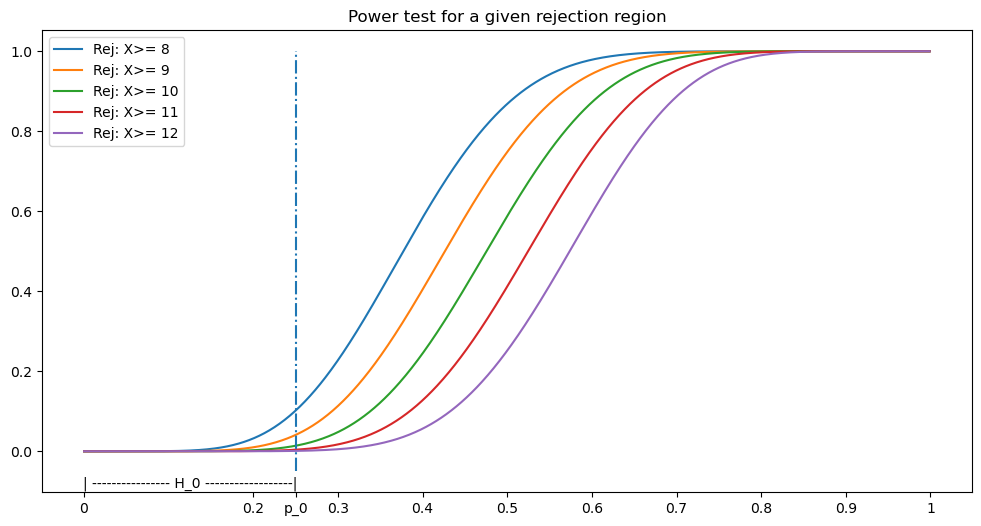

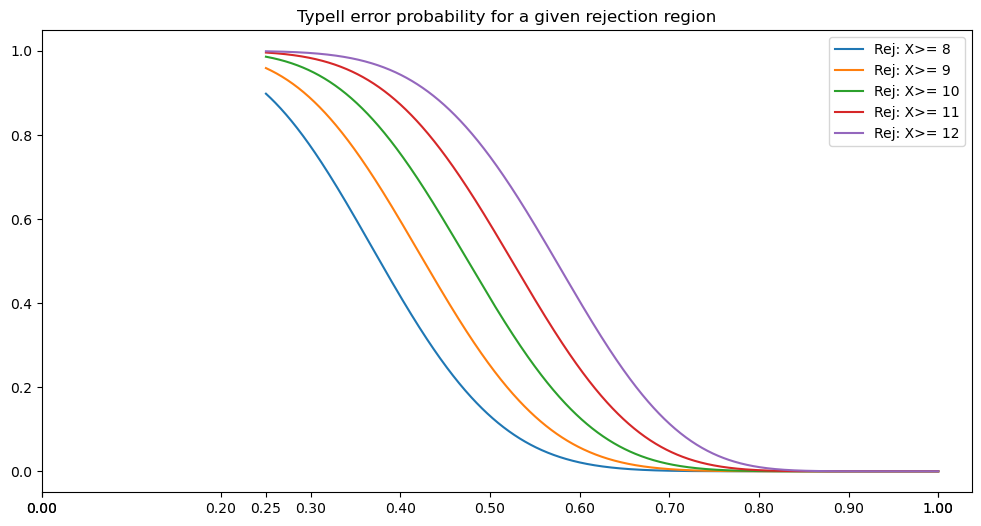

In [ ]:
X_rejs = [8, 9, 10, 11, 12]
n = 20
thetas = np.linspace(0.0001, 0.999,1000)
H1 = np.linspace(p0, 1, 1000)
fig, ax = plt.subplots(sharex=True)
fig2, ax2 = plt.subplots(sharex=True)

for critical_value in X_rejs:
    power = power_test("binom", critical_value, "greater", *[n])
    ax.plot(thetas, power(thetas), markersize = 0.8,label = f"Rej: X>= {critical_value}")
    ax.set_title("Power test for a given rejection region")
    ax.set_xticks(ticks= [0, 0.2, 0.25,0.3, 0.4,0.5, 0.6,0.7, 0.8,0.9, 1])
    ax.legend()
    ax2.plot(H1, 1-power(H1),markersize = 0.8, label = f"Rej: X>= {critical_value}")
    ax2.set_title("TypeII error probability for a given rejection region")
    ax2.set_xticks(ticks= [0, 0,1, 0.2,0.25, 0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9,  1])
    ax2.legend()

ax.vlines(x = p0, ymin=-0.05, ymax=1, linestyles='dashdot')
#ax.text(x =0.25, y =-0.09, s = "p_0", )
ax.set_xticklabels(labels=[0, 0.2, "p_0",0.3, 0.4,0.5,  0.6,0.7,  0.8, 0.9, 1])
ax.annotate(xy = (-0.001, -0.09), text= "| ---------------- H_0 ------------------|")
ax2.annotate(xy = (-0.01, -0.09), text= "| ---------------- H_1 ------------------ |")
plt.show()

From both the plots of the power and the type II error probability we observe that the smaller the typeI error probability, the bigger the typeII is. There is a trade off between these two probabilities. Also, one has no control on the type I error other than the significance level, on the other hand the way one can control the type II error is by means of the sample size.

## Question:

At a recent trial a nurse was accused of being a mass murderer. The following information was given in evidence: "In a neonatal care unit that expects three deaths per year, three deaths occurred in a 14 day period."
Question: How would you use this information to determine whether the nurse charged with mass murder was guilty.


### Attempted solution:



In this context we will model the number of deaths as a Poisson process. For this we have to assume that the deaths are independent (independency of the events),  independent increments (that is, in disjoint time intervals the numbers of deaths are independent random variables) and stationary increments (that is, the rate of the deaths depends only on the length of the time interval).

Then, this Poisson process has a rate of $\lambda = \frac{3}{365}$ deaths per day. Now in a 14 day period the rate is $\frac{3}{365}*14$.

To give an answer to the question we make a hypothesis test on the rate of a Poisson random variable. The competing hypotheses are:

$$
H_0:~ \lambda \leq \frac{42}{365} \qquad \text{Vs} \quad H_1:~ \lambda> \frac{42}{365}
$$

Let $X$ be the random variable of the number of deaths in 14 days, then under the null hypothesis the distribution of $X$ is

$$
X \sim_{H_0} Pois(42/365)
$$

We will use this random variable as a test statistic. the decision rule will be based on the p-value of the test for the data observed, that is, 3 deaths in 14 days.

Recall tha the p-value of a test for a given sample is the probability, under the null, of observing a test statistic at least as contradictory to $H_0$ as the one observed. In our case the observed statistic is 3, then the p-value is:

$$
p_{val} = \mathbb{P}(X\geq 3 | H_0 \text{ is true}) = 1 - \mathbb{P}(X\leq 2 | H_0 \text{ is true})
$$



In [ ]:
import scipy.stats

lamb_0 = 42/365

p_val = 1 - scipy.stats.poisson.cdf(2, mu = lamb_0)

print(f"p_val of the test for the given sample is {p_val}")




p_val of the test for the given sample is 0.00023299485345185111


In other words if the true rate is 42/365, then the chances of observing the data we observed are 0.02% or 2 in 10000.

In the light of this result and of course under the aformentioned assumptions, the statistician rejects the null hypothesis in favor of the alternative one, which implies, in plain words, that something "fishy" happend during the nurse watch as the observe pattern was quite unlikely under the null hypothesis.

### Binomial statistic:

In [ ]:
scipy.stats.poisson.cdf(1, mu = 3/65)

0.998967122911751

Note that we could use a Binomial statistic, since the probability of occurring at most one death in a day is
$$
\mathbb{P}_{H_0}(X \leq 1) = 0.999
$$

so we can approximate and assume that the number of deaths in a day is a Bernoulli r.v.  In this case the test we make is on the probability $p$ of a Bernoulli:

$$
H_0:~ p\leq \frac{3}{365} \qquad \text{Vs} \quad H_1: p>\frac{3}{365}
$$

Let $Y$ the number of deaths in 14 days, which under the null is a $Binom(14, 3/365)$. This will serve as our test statistic. The p-valaue of the test for the given observed data is:
$$
p_{val} = \mathbb{P}(Y\geq 3|H_0 \text{ is true})
$$

In [ ]:
p_val = 1 - scipy.stats.binom.cdf(2, n = 14, p =3/365)
print(p_val)

0.0001888461753537518


which as expected is quite similar to the one obtained with the poisson. The conclusion of the test will be the same as before.

## Bayesian Approach:

### Bayesian for Poisson

In [ ]:
# prior

eps = 0.1  # weight for the prior believe
lamb_prior = 42/365
a_prior = eps*lamb_prior
b_prior = eps
x = 3

# prior for lambda is a Gamma(a_prior, b_prior)

# posterior for lambda is Gamma(a_post, b_post) with a_post = a_prior + x  b_post = b_prior + n with n=1

a_post =  a_prior + x
b_post = b_prior + 1

In [ ]:
t_q = scipy.stats.gamma.ppf(0.01, a = a_post, scale = 1/b_post)

print(f"The posterior probability of lambda >= {t_q} is {1 - scipy.stats.gamma.cdf(t_q, a = a_post, scale = 1/b_post)}" )

The posterior probability of lambda >= 0.40000934196762583 is 0.99


In [ ]:
t_q_prior = scipy.stats.gamma.ppf(0.05, a = a_prior, scale = 1/b_prior)

print(f"The prior probability of lambda >= {t_q_prior} is {0.95}" )

The prior probability of lambda >= 4.871960056825096e-113 is 0.95


In [ ]:
print(f"The prior probability of lambda >= {t_q} is {1 - scipy.stats.gamma.cdf(t_q, a = a_prior, scale = 1/b_prior)}" )

The prior probability of lambda >= 0.40000934196762583 is 0.03048160002006106


In [ ]:
print(f"The prior probability of lambda >=42/365 = {lamb_prior} is {1 - scipy.stats.gamma.cdf(lamb_prior, a = a_prior, scale = 1/b_prior)}" )

The prior probability of lambda >=42/365 = 0.11506849315068493 is 0.043976535651450765


In [ ]:
print(f"The posterior probability of lambda >=42/365 = {lamb_prior} is {1 - scipy.stats.gamma.cdf(lamb_prior, a = a_post, scale = 1/b_post)}" )

The posterior probability of lambda >=42/365 = 0.11506849315068493 is 0.9997041001792253


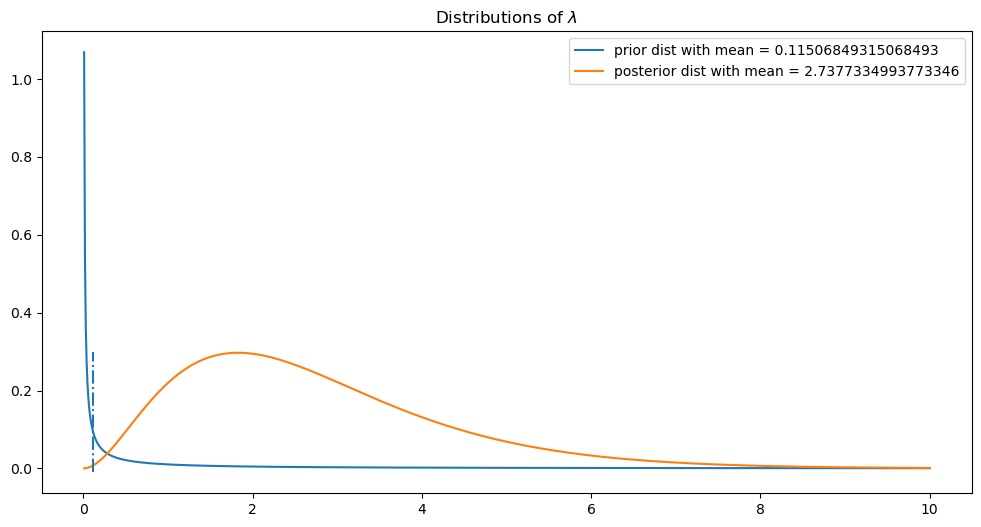

In [ ]:
z = np.linspace(0.01, 10, 1000)
f_prior = scipy.stats.gamma.pdf(z, a = a_prior, scale= 1/b_prior)
f_posterior = scipy.stats.gamma.pdf(z, a = a_post, scale= 1/b_post)

plt.plot(z, f_prior, label = f"prior dist with mean = {a_prior/b_prior}")
plt.plot(z, f_posterior, label = f"posterior dist with mean = {a_post/b_post}")
plt.vlines(x = lamb_prior, ymin = -0.01, ymax = 0.3, linestyles='dashdot')
plt.legend()
plt.title("Distributions of $\lambda$")
plt.show()

### Binomial

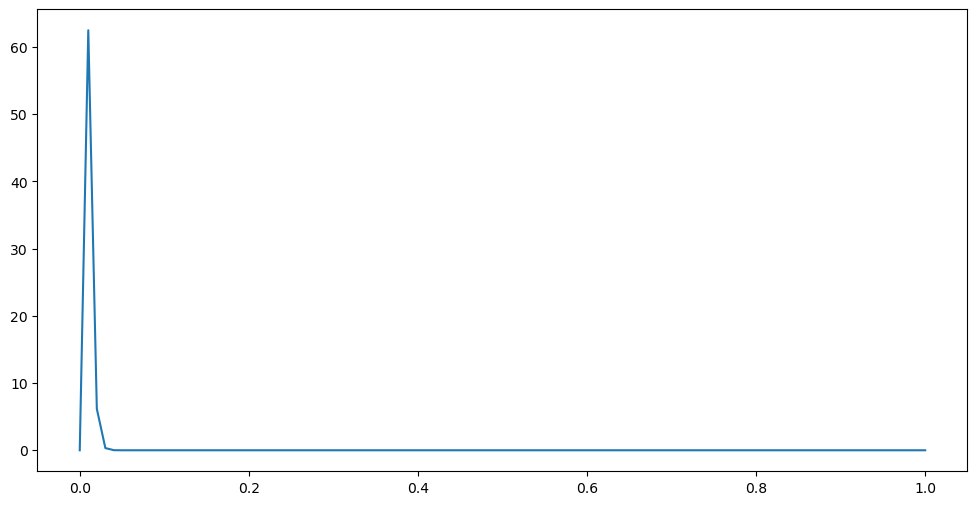

In [ ]:
a_prior = 3
b_prior = 362


x = np.linspace(0, 1, 100)
f = scipy.stats.beta.pdf(x, a = a_prior, b=b_prior)

plt.plot(x, f)
plt.show()

In [ ]:
x = 3
n = 14

a_post = x + a_prior -1
b_post = n - x +b_prior -1

t_q = scipy.stats.beta.ppf(0.05, a = a_post, b = b_post)

t_q

0.0052539789383291525

In [ ]:
3/365

0.00821917808219178

In [ ]:
t_q_prior = scipy.stats.beta.ppf(0.05, a = a_prior, b = b_prior)
t_q_prior

0.002250065181322294